In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df.rename(columns={
    'N': 'Nitrogen in Soil',
    'P': 'Phosphorus in Soil',
    'K': 'Potassium in Soil',
    'label': 'Crop Type'
}, inplace=True)

In [8]:
df.columns

Index(['Nitrogen in Soil', 'Phosphorus in Soil', 'Potassium in Soil',
       'temperature', 'humidity', 'ph', 'rainfall', 'Crop Type'],
      dtype='object')

#### Distribution of Numerical features

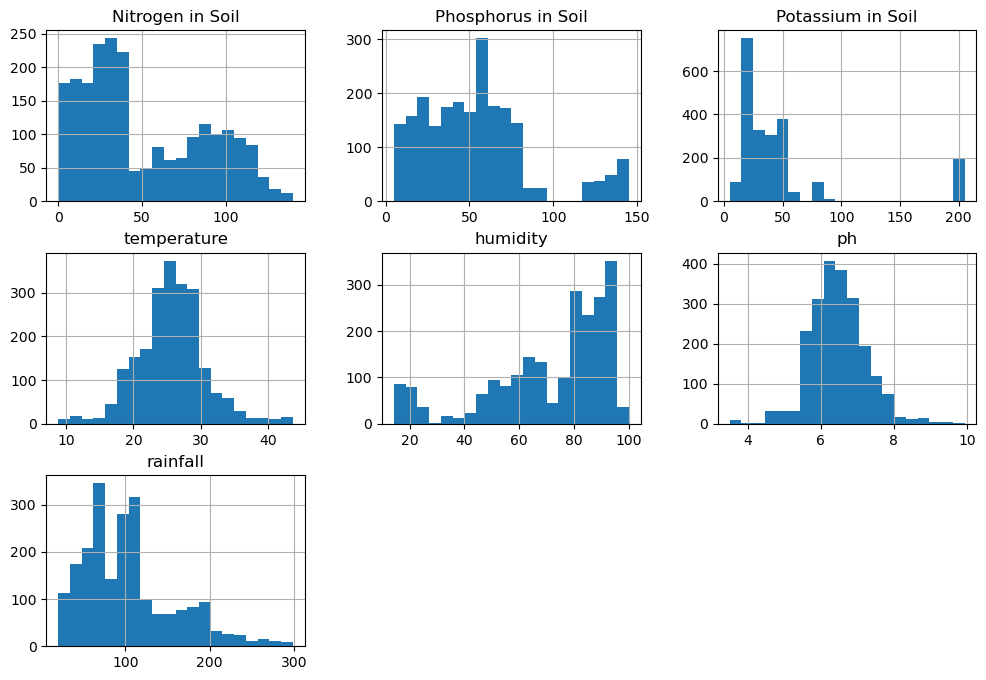

In [9]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

In [10]:
import seaborn as sns

#### Checking for Multicollinearity

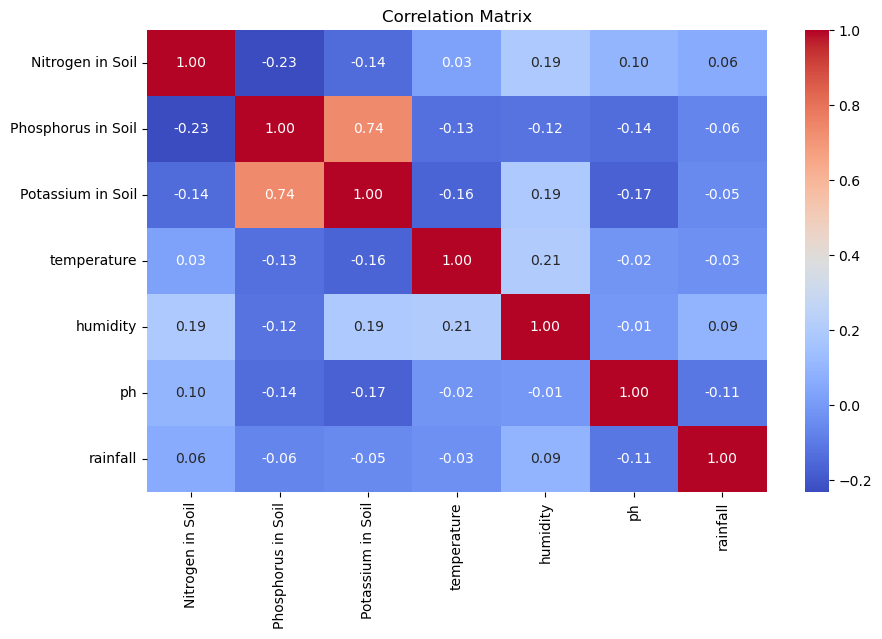

In [11]:
plt.figure(figsize=(10, 6))

# Dropping non-numeric columns before computing correlation
corr_matrix = df.drop(columns=['Crop Type']).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

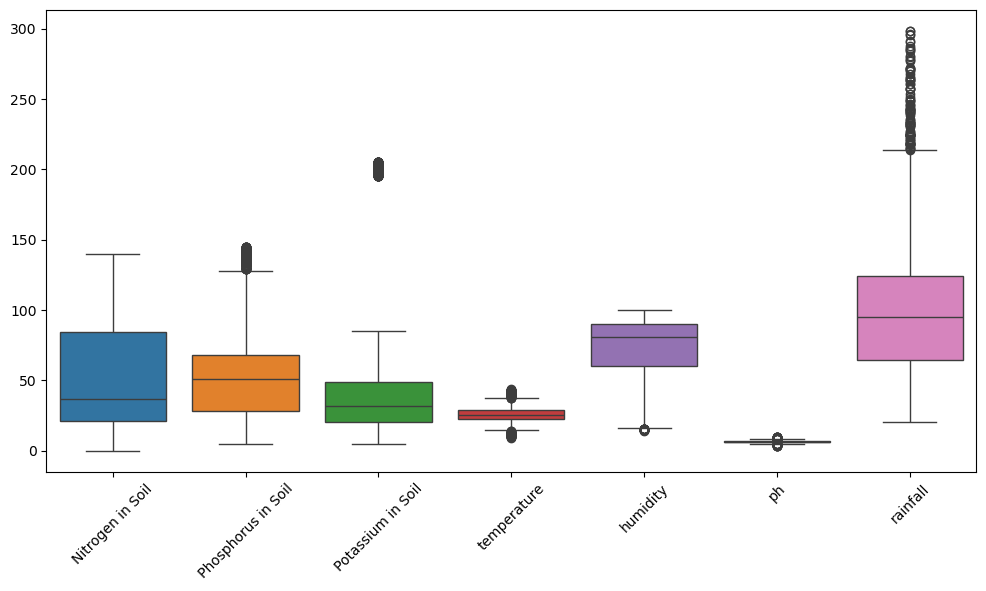

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

#### Encoding the Target Variable

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Crop Type'] = encoder.fit_transform(df['Crop Type'])

In [14]:
# To check assigned values
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nitrogen in Soil    2200 non-null   int64  
 1   Phosphorus in Soil  2200 non-null   int64  
 2   Potassium in Soil   2200 non-null   int64  
 3   temperature         2200 non-null   float64
 4   humidity            2200 non-null   float64
 5   ph                  2200 non-null   float64
 6   rainfall            2200 non-null   float64
 7   Crop Type           2200 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 129.0 KB


In [16]:
df.columns

Index(['Nitrogen in Soil', 'Phosphorus in Soil', 'Potassium in Soil',
       'temperature', 'humidity', 'ph', 'rainfall', 'Crop Type'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
feature_columns = ['Nitrogen in Soil', 'Phosphorus in Soil', 'Potassium in Soil',
                   'temperature', 'humidity', 'ph', 'rainfall']

In [19]:
scaler = StandardScaler()

In [20]:
df_scaled = df.copy()  # Keep a copy of original dataframe
df_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])

In [21]:
print(df_scaled.head())

   Nitrogen in Soil  Phosphorus in Soil  Potassium in Soil  temperature  \
0          1.068797           -0.344551          -0.101688    -0.935587   
1          0.933329            0.140616          -0.141185    -0.759646   
2          0.255986            0.049647          -0.081939    -0.515898   
3          0.635298           -0.556811          -0.160933     0.172807   
4          0.743673           -0.344551          -0.121436    -1.083647   

   humidity        ph  rainfall  Crop Type  
0  0.472666  0.043302  1.810361         20  
1  0.397051  0.734873  2.242058         20  
2  0.486954  1.771510  2.921066         20  
3  0.389805  0.660308  2.537048         20  
4  0.454792  1.497868  2.898373         20  


#### Splitting the Data into Independent and dependent(Target) Variable

In [22]:
X = df_scaled.drop(columns=['Crop Type'])
y = df_scaled['Crop Type']

#### Splitting the training and testing data into 80:20

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Check the shape of the split data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (1760, 7), X_test shape: (440, 7)
y_train shape: (1760,), y_test shape: (440,)


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(max_iter=200, random_state=42)

In [27]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [28]:
y_train_pred = lr.predict(X_train)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Calculating Training Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Logistic Regression - Training Accuracy: {train_accuracy:.4f}")

Logistic Regression - Training Accuracy: 0.9739


In [31]:
# Predict on Test Data
y_test_pred = lr.predict(X_test)

# Calculate Test Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Logistic Regression - Test Accuracy: {test_accuracy:.4f}")


Logistic Regression - Test Accuracy: 0.9727


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

print(f"Cross-Validation Accuracy: {cv_mean:.4f}")


Cross-Validation Accuracy: 0.9676


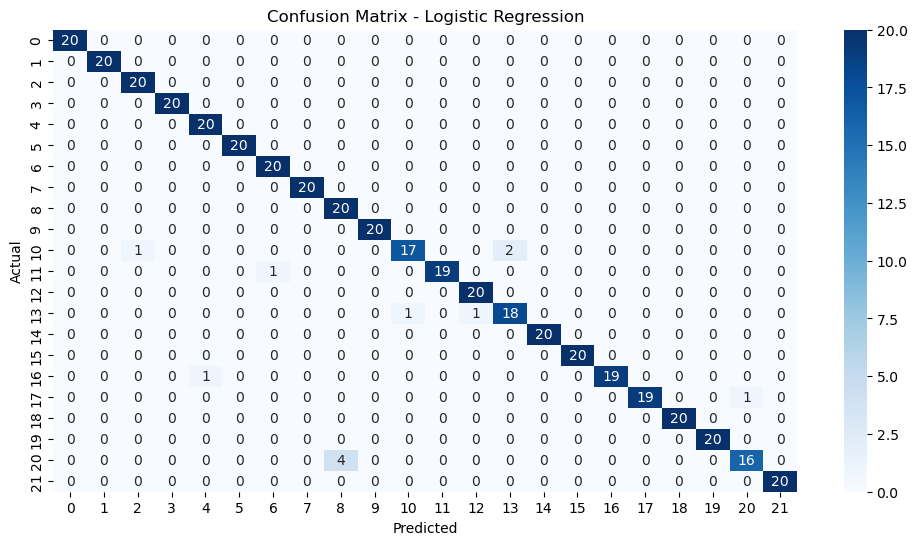

In [33]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [34]:
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_test_pred))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.83      1.00      0.91        20
           9       1.00      1.00      1.00        20
          10       0.94      0.85      0.89        20
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.98        20
          13       0.90      0.90      0.90        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      0.95   

### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [37]:
# Train on X_train
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Training Accuracy
y_train_pred_dt = dt.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Decision Tree - Training Accuracy: {train_accuracy_dt:.4f}")

Decision Tree - Training Accuracy: 1.0000


In [39]:
# Predict on X_test
y_test_pred_dt = dt.predict(X_test)

# Test Accuracy
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree - Test Accuracy: {test_accuracy_dt:.4f}")

Decision Tree - Test Accuracy: 0.9795


In [40]:
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

print(f"Cross-Validation Accuracy: {cv_mean:.4f}")

Cross-Validation Accuracy: 0.9847


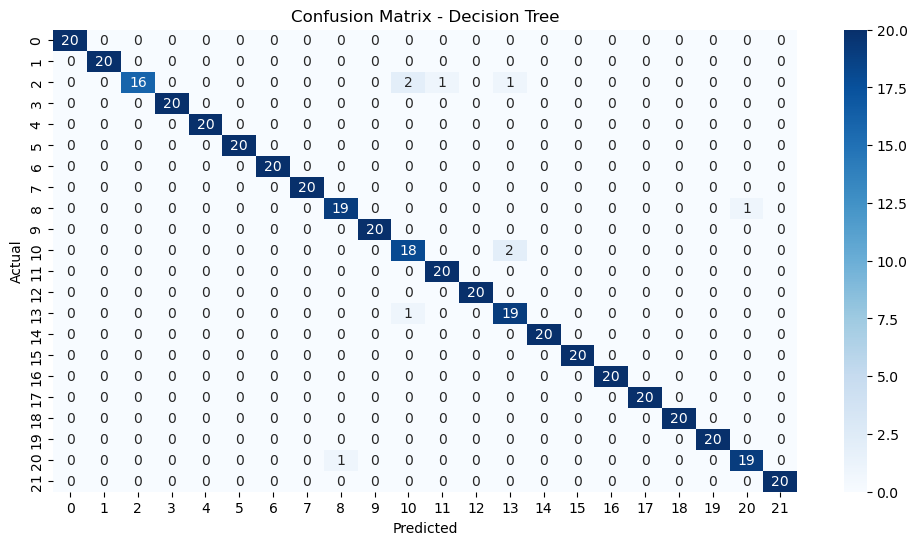

In [41]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(12, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [42]:
# Classification Report
print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_test_pred_dt))

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.80      0.89        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      0.95      0.95        20
           9       1.00      1.00      1.00        20
          10       0.86      0.90      0.88        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       0.86      0.95      0.90        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.0

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# Train on X_train
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Training Accuracy
y_train_pred_rf = rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Random Forest - Training Accuracy: {train_accuracy_rf:.4f}")


Random Forest - Training Accuracy: 1.0000


In [47]:
# Predict on X_test
y_test_pred_rf = rf.predict(X_test)


In [48]:
# Test Accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest - Test Accuracy: {test_accuracy_rf:.4f}")

Random Forest - Test Accuracy: 0.9955


In [49]:
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

print(f"Cross-Validation Accuracy: {cv_mean:.4f}")

Cross-Validation Accuracy: 0.9847


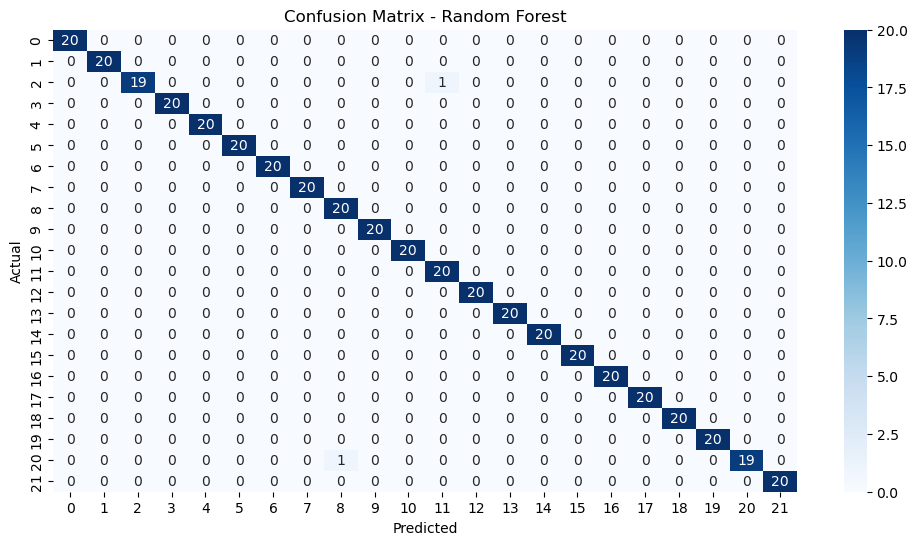

In [50]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(12, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [51]:
# Classification Report
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_test_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.0

### SVC(Support Vector Classifier)

In [52]:
from sklearn.svm import SVC

In [53]:
# Initialize and train the SVC model
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(X_train, y_train)

SVC()

In [54]:
# Training Accuracy
y_train_pred_svc = svc.predict(X_train)
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
print(f"Support Vector Classifier - Training Accuracy: {train_accuracy_svc:.4f}")


Support Vector Classifier - Training Accuracy: 0.9858


In [55]:
# Predict on X_test
y_test_pred_svc = svc.predict(X_test)


In [56]:
# Test Accuracy
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
print(f"Support Vector Classifier - Test Accuracy: {test_accuracy_svc:.4f}")

Support Vector Classifier - Test Accuracy: 0.9841


In [57]:
cv_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

print(f"Cross-Validation Accuracy: {cv_mean:.4f}")

Cross-Validation Accuracy: 0.9767


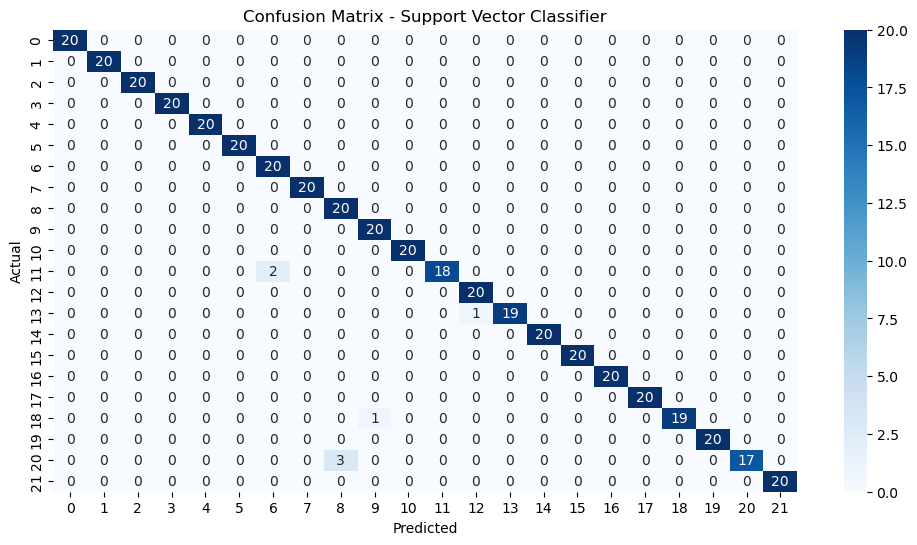

In [58]:
# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_test_pred_svc)
plt.figure(figsize=(12, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

In [59]:
# Classification Report
print("Classification Report - Support Vector Classifier:")
print(classification_report(y_test, y_test_pred_svc))


Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       0.87      1.00      0.93        20
           9       0.95      1.00      0.98        20
          10       1.00      1.00      1.00        20
          11       1.00      0.90      0.95        20
          12       0.95      1.00      0.98        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1

### KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# Initialize KNN Classifier with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
# Training Accuracy
y_train_pred_knn = knn.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print(f"KNN Classifier - Training Accuracy: {train_accuracy_knn:.4f}")


KNN Classifier - Training Accuracy: 0.9847


In [64]:
# Predict on X_test
y_test_pred_knn = knn.predict(X_test)


In [65]:
# Test Accuracy
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"KNN Classifier - Test Accuracy: {test_accuracy_knn:.4f}")

KNN Classifier - Test Accuracy: 0.9795


In [66]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = np.mean(cv_scores)

print(f"Cross-Validation Accuracy: {cv_mean:.4f}")

Cross-Validation Accuracy: 0.9653


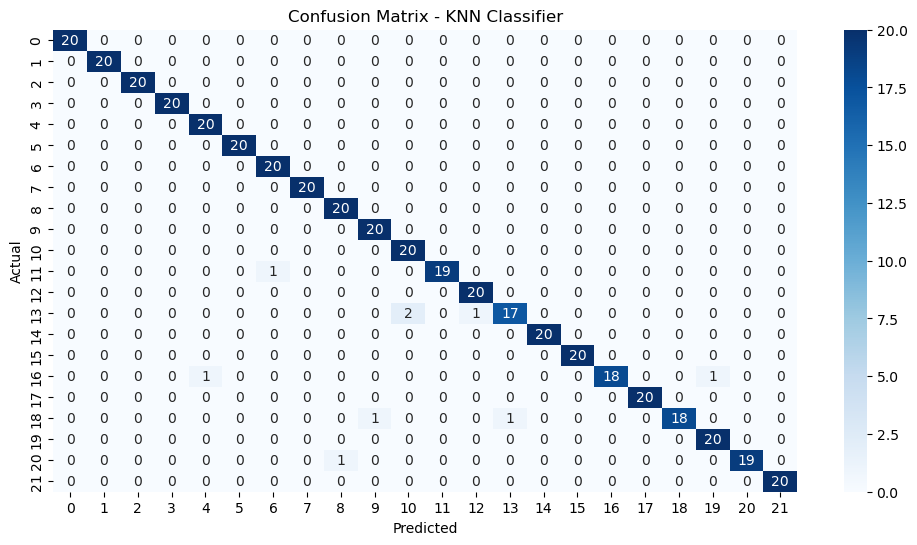

In [67]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(12, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

In [68]:
# Classification Report
print("Classification Report - KNN Classifier:")
print(classification_report(y_test, y_test_pred_knn))


Classification Report - KNN Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       0.95      1.00      0.98        20
          10       0.91      1.00      0.95        20
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.98        20
          13       0.94      0.85      0.89        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      0.90      0.

| Model Name | Train Acc | Test Acc| Cross-val- Acc |
|--|--|--|--|
| Logistic Reg |   97.39% |   97.27%  |  96.76%|
|Decision Tree  | 100%    |  97.95%    |98.47%|
|**Random Forest**  |  **100%**  | **99.55%**    |**98.47%**|
|SV Classifier|98.58%|98.41%|97.67%|
|KNN Classifier|98.47%|97.95%|96.53%

#### Final Comparison & Best Model Selection
#### After evaluating multiple models, Random Forest (RF) emerges as the best-performing model based on the following:<br>

<b>✅Highest Test Accuracy (99.55%) → Best generalization to unseen data.<b><br>
✅ Highest Cross-Validation Accuracy (98.47%) → Consistently performs well across different data splits.<br>
✅ Handles Overfitting Well → Unlike Decision Tree (which overfits), RF uses multiple trees to reduce variance.<br>
✅ Robust to Noise & Outliers → Works well even with complex datasets.<br>
✅ No Need for Feature Scaling → Unlike SVC and KNN, RF doesn’t require extensive preprocessing.<br>

While other models like SVC (98.41% test accuracy) and KNN (97.95% test accuracy) also perform well, they have limitations:<br>

SVC is computationally expensive for large datasets.<br>
KNN struggles with generalization and slows down as data grows.<br>
Thus, Random Forest is the best choice for this dataset, offering the highest accuracy, stability, and generalization. <br>


#### Testing on a data that is unseen

In [69]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = rf.predict(data)
print(prediction)

[0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = rf.predict(data)

# Convert the predicted label back to the original class name
original_class = encoder.inverse_transform(prediction)

print(original_class)

['apple']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
